In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



In [13]:
data=pd.read_csv('/content/Heart_Disease_Prediction.csv')
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [14]:
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})
display(data.head())

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [15]:
#
X = pd.DataFrame(data.drop(['Heart Disease'], axis=1))
y = data['Heart Disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [16]:
#  Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}


In [20]:
# Train, predict, and store accuracy
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

KNN Accuracy: 0.7901
Naive Bayes Accuracy: 0.8395
LDA Accuracy: 0.8395
Decision Tree Accuracy: 0.7160
Random Forest Accuracy: 0.7654
SVM Accuracy: 0.8272
Logistic Regression Accuracy: 0.8272


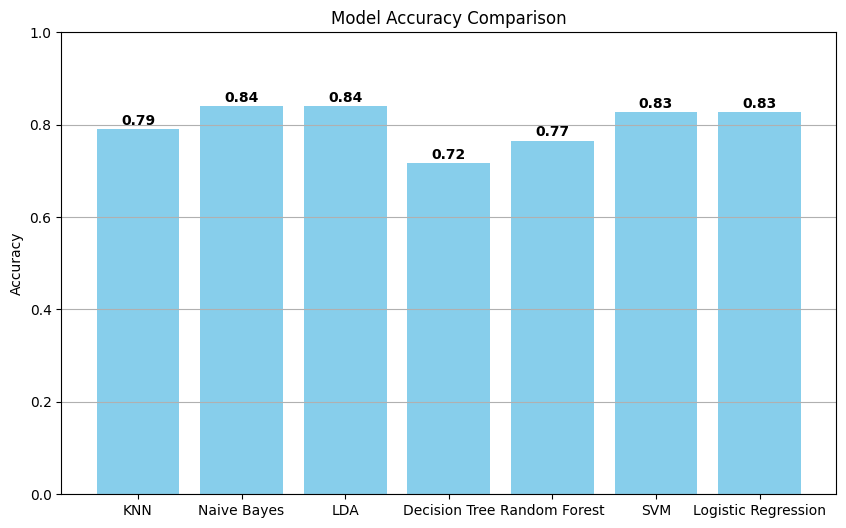

In [21]:
# Plot the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [22]:
from sklearn.decomposition import PCA
#apply principal component analysis
pca = PCA()
X_pca = pca.fit_transform(X)

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [33]:
# Train, predict, and store accuracy
accuracies_pca = {}
for name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    acc_pca = accuracy_score(y_test1, y_pred1)
    accuracies_pca[name] = acc_pca
    print(f"{name} Accuracy: {acc_pca:.4f}")

KNN Accuracy: 0.8272
Naive Bayes Accuracy: 0.8765
LDA Accuracy: 0.8395
Decision Tree Accuracy: 0.6790
Random Forest Accuracy: 0.7407
SVM Accuracy: 0.8148
Logistic Regression Accuracy: 0.8272


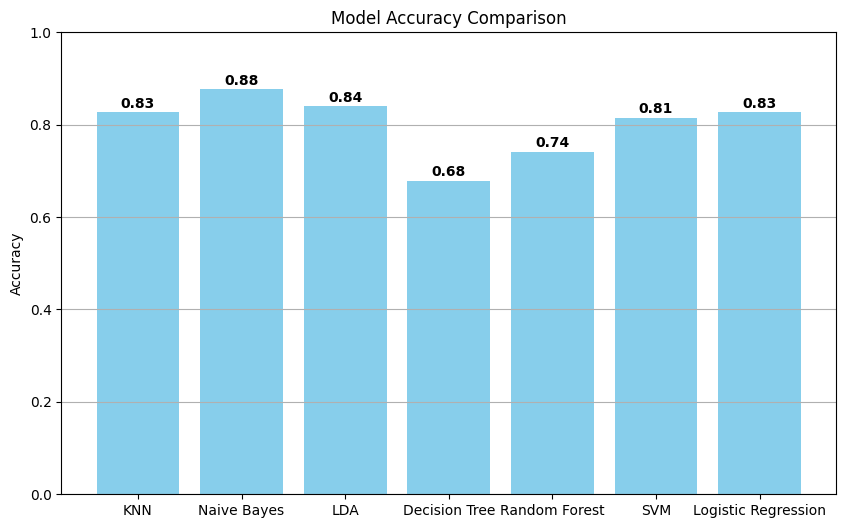

In [34]:
# Plot the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(accuracies_pca.keys(), accuracies_pca.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
for i, v in enumerate(accuracies_pca.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [36]:
import joblib as jb
gb_model=GaussianNB()
gb_model.fit(X_train1,y_train1)
jb.dump(gb_model,'gb_model(heart).pkl')
jb.dump(scaler,'scaler(heart).pkl')

['scaler(heart).pkl']